In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
SpicyFood_vs_AcidReflux= {
    'content_creator':np.random.choice(['Filipino','Korean'],100),
    'age':np.round(np.random.normal(35,19,100),2),
    'spicy_meals_per_week':np.round(np.random.normal(6,1,100),2),
    'reflux_episodes_per_week':np.round(np.random.uniform(6,0,100),2),
    'known_stomach_issues':np.round(np.random.uniform(1,10,100),2),
}

df=pd.DataFrame(SpicyFood_vs_AcidReflux)
df.to_csv('SpicyFood_vs_AcidReflux_data.csv',index=False)

In [6]:
df=pd.read_csv('SpicyFood_vs_AcidReflux_data.csv')
print("Original Data Shape:",df.shape)

Original Data Shape: (100, 5)


In [7]:
df.loc[np.random.choice(df.index,10),'age']=np.nan
df.loc[np.random.choice(df.index,5),'spicy_meals_per_week']=np.nan

In [8]:
df.to_csv('SpicyFood_vs_AcidReflux_data_miss.csv',index=False)

In [9]:
df=pd.read_csv('SpicyFood_vs_AcidReflux_data_miss.csv')
print("Original Data Shape:",df.shape)
df['age']=df['age'].fillna(df['age'].mean())
df=df.dropna(subset=['spicy_meals_per_week'])
print("Cleaned Data Shape:",df.shape)
df.to_csv('SpicyFood_vs_AcidReflux_data_clean.csv',index=False)

Original Data Shape: (100, 5)
Cleaned Data Shape: (95, 5)


In [10]:
#Numpy
age=df['age'].to_numpy()
spicy_meals_per_week=df['spicy_meals_per_week'].to_numpy()
correlation=np.corrcoef(age,spicy_meals_per_week)[0,1]
print(f"Correlation between age and spicy meals per week:{correlation:.2f}")

Correlation between age and spicy meals per week:-0.07


In [13]:
#Extra NumPy operation
median_reflux = np.median(df['reflux_episodes_per_week'])
print("Median reflux per week:", median_reflux)

Median reflux per week: 3.2


In [14]:
#Scipy
Filipino_spicy_meals_per_week=df[df['content_creator']=='Filipino']['spicy_meals_per_week']
Korean_spicy_meals_per_week=df[df['content_creator']=='Korean']['spicy_meals_per_week']
t_stat,p_value=stats.ttest_ind(Filipino_spicy_meals_per_week,Korean_spicy_meals_per_week)
print(f"T-test between Filipino and Korean spicy meals per week:t={t_stat:.2f},p={p_value:3f}")

T-test between Filipino and Korean spicy meals per week:t=0.41,p=0.685165


In [15]:
#Statsmodels
X=sm.add_constant(df['spicy_meals_per_week'])
model=sm.OLS(df['age'],X).fit()
print("\nlinear Regression Summary:")
print(model.summary())


linear Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                    age   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.5090
Date:                Tue, 20 May 2025   Prob (F-statistic):              0.477
Time:                        22:50:04   Log-Likelihood:                -405.76
No. Observations:                  95   AIC:                             815.5
Df Residuals:                      93   BIC:                             820.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
cons

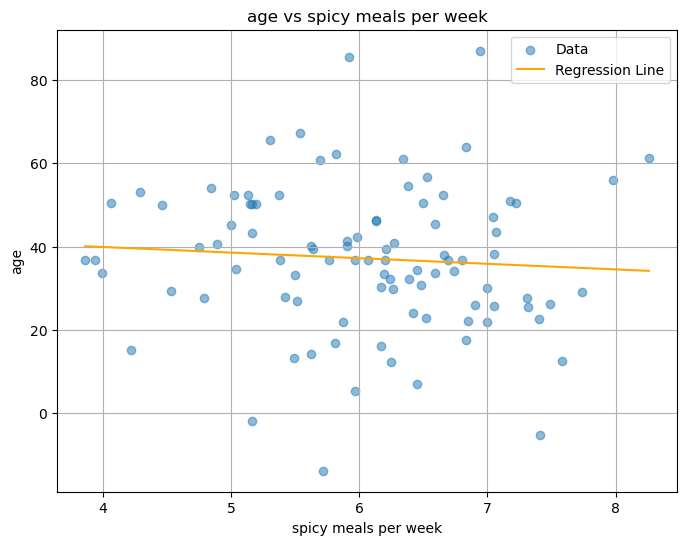

In [18]:
#Visualisation(Linear Registration) via Matplotlib
plt.figure(figsize=(8,6))
plt.scatter(df['spicy_meals_per_week'],df['age'],alpha=0.5,label='Data')
x_range=np.linspace(df['spicy_meals_per_week'].min(),df['spicy_meals_per_week'].max(),100)
y_pred=model.params.iloc[0]+model.params.iloc[1]*x_range
plt.plot(x_range,y_pred,color='orange',label='Regression Line')
plt.title('age vs spicy meals per week')
plt.xlabel('spicy meals per week')
plt.ylabel('age')
plt.legend()
plt.grid(True)
plt.show()

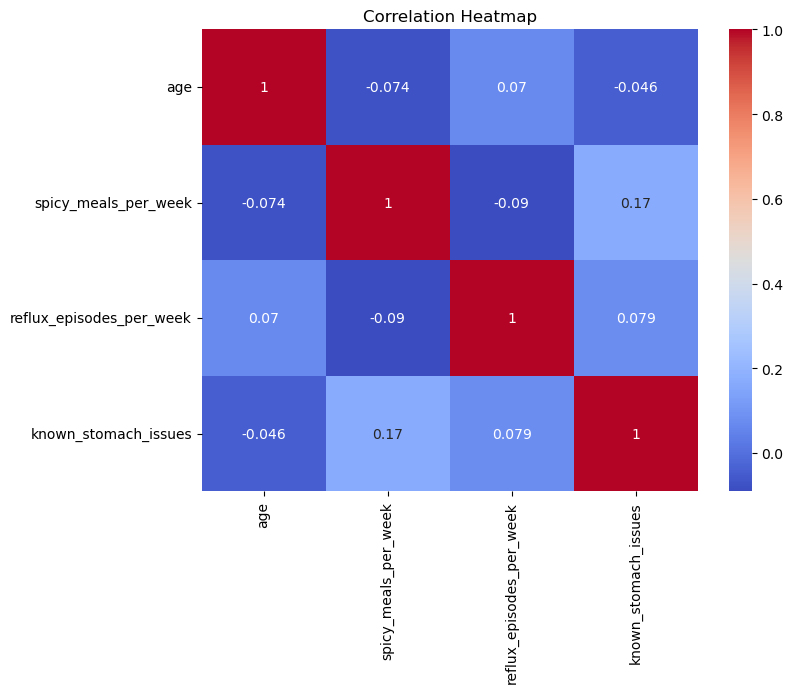

In [19]:
#Statistical visualisation(Boslot?Heatmap) via Seaborn
plt.figure(figsize=(8,6))
sns.boxplot(x='content_creator',y='known_stomach_issues',data=df)
plt.title('Effect of stomach issues on content creator')
plt.savefig('stomach_issues_on_content_creator.png')
plt.close()
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()

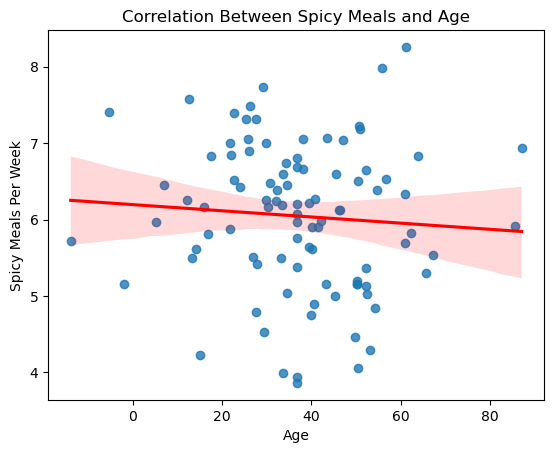

In [20]:
# Correlation plot with regression line
sns.regplot(data=df, x='age', y='spicy_meals_per_week', line_kws={'color': 'red'})
plt.title('Correlation Between Spicy Meals and Age')
plt.xlabel('Age')
plt.ylabel('Spicy Meals Per Week')
plt.show()